In [1]:
import numpy as np
import pandas as pd
# to display full text
pd.set_option('display.max_colwidth', -1)
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive

/content/drive


In [4]:
pwd

'/content/drive'

In [0]:
df = pd.read_csv('My Drive/Features_for_gcn_after_removing_duplicates_german.csv')

### label.1 is target variable

In [0]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df.head()

,abl,aboard,abov,absolut,accid,accord,account,action,actual,affect,agre,ahead,aipx,airbu,airbusa,aircraft,airlin,airplan,airport,allah,allen,allow,almost,alp,alreadi,also,altitud,alway,american,among,andrea,andreaslubitz,angeh,angela,anoth,answer,anymor,anyon,anyth,appar,...,voic,vuelo,wait,wake,wakeupamerica,want,watch,weather,websit,week,weird,well,went,whether,white,whole,wind,wing,wish,within,without,wonder,word,work,worker,world,wors,worst,would,write,wrong,yeah,year,yesterday,young,user_id,favorites_count,verified,followers_count,target_variable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.330472e+06,15.0,1.0,179430.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.277131e+07,22.0,1.0,20839.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.660893e+08,2619.0,1.0,3237.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.014178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621157e+07,61700.0,1.0,11982.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.566535e+09,6204.0,1.0,35880.0,1


In [8]:
df.shape

(2907, 766)

## not to be executed

df.to_csv('removed_unwanted_features.csv')

In [9]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: ignored

In [10]:
df.head()

,abl,aboard,abov,absolut,accid,accord,account,action,actual,affect,agre,ahead,aipx,airbu,airbusa,aircraft,airlin,airplan,airport,allah,allen,allow,almost,alp,alreadi,also,altitud,alway,american,among,andrea,andreaslubitz,angeh,angela,anoth,answer,anymor,anyon,anyth,appar,...,voic,vuelo,wait,wake,wakeupamerica,want,watch,weather,websit,week,weird,well,went,whether,white,whole,wind,wing,wish,within,without,wonder,word,work,worker,world,wors,worst,would,write,wrong,yeah,year,yesterday,young,user_id,favorites_count,verified,followers_count,target_variable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.330472e+06,15.0,1.0,179430.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.277131e+07,22.0,1.0,20839.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.660893e+08,2619.0,1.0,3237.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.014178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621157e+07,61700.0,1.0,11982.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.566535e+09,6204.0,1.0,35880.0,1


In [11]:
df.shape

(2907, 766)

In [12]:
df.loc[207, 'user_id']

0.0

In [0]:
df.drop(207, axis = 0, inplace = True)

In [14]:
df.shape

(2906, 766)

In [15]:
df['target_variable'].unique()

array([0, 1])

In [16]:
print("Class 0 percentage: ", round((sum(df['target_variable'] == 0))/len(df), 2))
print("Class 1 percentage: ", round((sum(df['target_variable'] == 1))/len(df), 2))

Class 0 percentage:  0.5
Class 1 percentage:  0.5


In [0]:
X = df.iloc[:, :-1].values #Take all the columns except last one
y = df.iloc[:, -1].values #Take the last column as the result

In [0]:
# cross validation
from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator=regressor, X=X, y=y, cv=10)
#accuracies.mean()

In [19]:
type(X)

numpy.ndarray

'''# Taking care of missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X.iloc[:, 1:])
X.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])'''

## Encoding categorical data
## Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 3] = labelencoder_X.fit_transform(X.iloc[:, 3])

#Make dummy variables
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

#Avoiding the Dummy Variable Trap
X = X[:, 1:]

'''# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)'''



## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

'''# Library will do this automatically
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:, 3:] = sc_X.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc_X.transform(X_test[:, 3:])

#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1, 1))'''

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
folds = KFold(5,shuffle = True, random_state=0)
classifier = SVC()
n_classes = 2

In [23]:
X.shape

(2906, 765)

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#y = label_binarize(y, classes=[0, 1, 2, 3])

In [25]:
y.shape

(2906,)

In [0]:
n1 = df['target_variable']
classes = 2
y1 = np.zeros((len(df),classes))
#labels
n = list(n1)
for i in range(len(df)):
    if (n[i] == 1):
        y1[i,1] = 1
    elif (n[i] == 0):
        y1[i,0] = 1

In [27]:
y1.shape

(2906, 2)

In [0]:
n_classes = y1.shape[1]

In [0]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


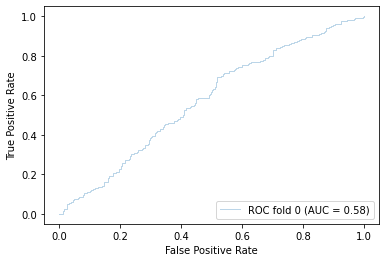

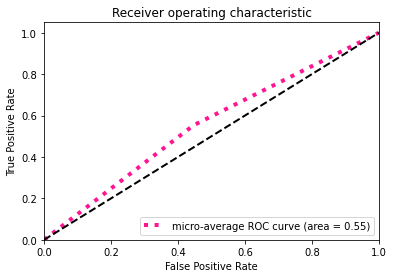

[[159 122]
 [138 163]]
Precision binary: 0.572
Precision micro: 0.553
Precision macro: 0.554
Recall binary: 0.542
Recall micro: 0.553
Recall macro: 0.554
F-Measure: 0.556
0.5532646048109966
[159 163]
[138 122]
[122 138]
[163, 159]
Accuracy:  [0.5532646 0.5532646]
precision:  [0.53535354 0.57192982]
recall:  [0.5658363  0.54152824]
F1 measure:  [0.55017301 0.55631399]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


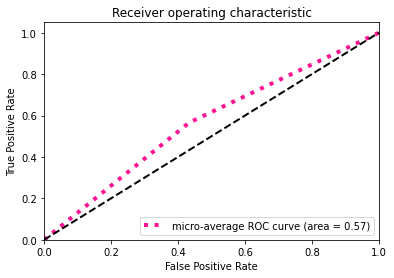

[[143 139]
 [113 186]]
Precision binary: 0.572
Precision micro: 0.566
Precision macro: 0.565
Recall binary: 0.622
Recall micro: 0.566
Recall macro: 0.565
F-Measure: 0.596
0.5662650602409639
[143 186]
[113 139]
[139 113]
[186, 143]
Accuracy:  [0.56626506 0.56626506]
precision:  [0.55859375 0.57230769]
recall:  [0.5070922  0.62207358]
F1 measure:  [0.53159851 0.59615385]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


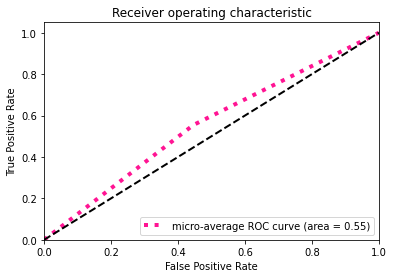

[[148 147]
 [112 174]]
Precision binary: 0.542
Precision micro: 0.554
Precision macro: 0.556
Recall binary: 0.608
Recall micro: 0.554
Recall macro: 0.555
F-Measure: 0.573
0.5542168674698795
[148 174]
[112 147]
[147 112]
[174, 148]
Accuracy:  [0.55421687 0.55421687]
precision:  [0.56923077 0.54205607]
recall:  [0.50169492 0.60839161]
F1 measure:  [0.53333333 0.57331137]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


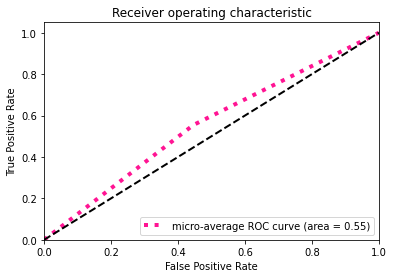

[[150 152]
 [107 172]]
Precision binary: 0.531
Precision micro: 0.554
Precision macro: 0.557
Recall binary: 0.616
Recall micro: 0.554
Recall macro: 0.557
F-Measure: 0.570
0.5542168674698795
[150 172]
[107 152]
[152 107]
[172, 150]
Accuracy:  [0.55421687 0.55421687]
precision:  [0.58365759 0.5308642 ]
recall:  [0.49668874 0.61648746]
F1 measure:  [0.53667263 0.57048093]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


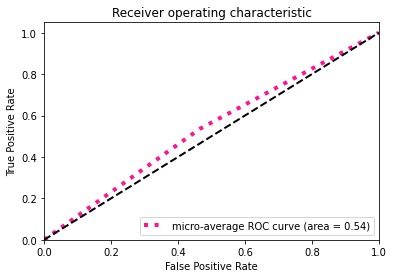

[[136 146]
 [124 175]]
Precision binary: 0.545
Precision micro: 0.535
Precision macro: 0.534
Recall binary: 0.585
Recall micro: 0.535
Recall macro: 0.534
F-Measure: 0.565
0.5352839931153184
[136 175]
[124 146]
[146 124]
[175, 136]
Accuracy:  [0.53528399 0.53528399]
precision:  [0.52307692 0.54517134]
recall:  [0.4822695  0.58528428]
F1 measure:  [0.50184502 0.56451613]


In [31]:
scores=[]
accuracy = []
metrics_acc = []
metrics_precision = []
metrics_recall = []
metrics_f1 = []
tp = []
tn = []
fp = []
fn = []
pmacro = []
pmicro = []
pbinary = []
rmacro = []
rmicro = []
rbi = []
a = []
f = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()


for i, (train, test) in enumerate(folds.split(X, y)):
    #X_train,X_test = X.iloc[training_index], X[testing_index]
    #y_train,y_test = y[training_index], y[testing_index]
    #standardization
    sc_X = StandardScaler() 
    X[train] = sc_X.fit_transform(X[train]) 
    X[test] = sc_X.transform(X[test])

    classifier.fit(X[train], y[train])
    viz = metrics.plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    y_pred = classifier.predict(X[test])

    y2 = np.zeros((len(test),n_classes))
    for i in range(len(test)):
        if (y_pred[i] == 1):
            y2[i,1] = 1
        elif (y_pred[i] == 0):
            y2[i,0] = 1
            

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y1[test, i], y2[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y1[test].ravel(), y2.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes
    lw = 2
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
  
    
    
    
    conf_mat = confusion_matrix(y[test], y_pred)
    print (conf_mat)
    p = precision_score(y[test], y_pred, average='binary')
    print('Precision binary: %.3f' % p)
    pbinary.append(p)
    p1 = precision_score(y[test], y_pred, average='micro')
    print('Precision micro: %.3f' % p1)
    pmicro.append(p1)
    p2 = precision_score(y[test], y_pred, average='macro')
    print('Precision macro: %.3f' % p2)
    pmacro.append(p2)
    r = recall_score(y[test], y_pred, average='binary')
    print('Recall binary: %.3f' % r)
    rbi.append(r)
    r1 = recall_score(y[test], y_pred, average='micro')
    print('Recall micro: %.3f' % r1)
    rmicro.append(r1)
    r2 = recall_score(y[test], y_pred, average='macro')
    print('Recall macro: %.3f' % r2)
    rmacro.append(r2)
    s = f1_score(y[test], y_pred, average='binary')
    print('F-Measure: %.3f' % s)
    f.append(s)

    ac = accuracy_score(y[test], y_pred)
    a.append(ac)
    

    print(accuracy_score(y[test], y_pred))




    TP = np.diag(conf_mat)
    print(TP)
    FP = np.sum(conf_mat, axis=0) - TP
    print(FP)
    FN = np.sum(conf_mat, axis=1) - TP
    print(FN)
    num_classes = 2
    TN = []
    for i in range(num_classes):
        temp = np.delete(conf_mat, i, 0)    # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    print(TN)
    
    acc = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    print("Accuracy: ", acc)
    
    print("precision: ", precision)
    
    print("recall: ", recall)
    F1 = 2 * ((precision * recall)/(precision + recall))
    print ("F1 measure: ", F1)
    
    tp.append(TP)
    tn.append(TN)
    fp.append(FP)
    fn.append(FN)
    
    
    metrics_acc.append(acc)
    metrics_precision.append(precision)
    metrics_recall.append(recall)
    metrics_f1.append(F1)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


    

In [32]:
print("precision macro: ", np.array(pmacro).mean())
print("precision micro: ", np.array(pmicro).mean())
print("precision binary macro: ", np.array(pbinary).mean())
print("accuracy: ", np.array(a).mean())
print("recall macro: ", np.array(rmacro).mean())
print("recall micro: ", np.array(rmicro).mean())
print("recall binary macro: ", np.array(rbi).mean())
print("f1: ", np.array(f).mean())

precision macro:  0.5532241693940044
precision micro:  0.5526494786214077
precision binary macro:  0.5524658257460355
accuracy:  0.5526494786214077
recall macro:  0.5527346820359307
recall micro:  0.5526494786214077
recall binary macro:  0.5947530324646342
f1:  0.572155252886122


In [0]:
import numpy
numpy.savetxt("/content/drive/My Drive/german_svm_fpr_mean.csv", mean_fpr, delimiter=",")
numpy.savetxt("/content/drive/My Drive/german_svm_tpr_mean.csv", mean_tpr, delimiter=",")

df_mean_fpr = pd.DataFrame(mean_fpr)
df_mean_fpr.to_csv('/content/drive/My Drive/df_mean_fpr_svm.csv')
df_mean_tpr = pd.DataFrame(mean_tpr)
df_mean_tpr.to_csv('/content/drive/My Drive/df_mean_tpr_svm.csv')

In [0]:
#micro-average classwise
micro_precision_group_0 = (tp[0][0] + tp[1][0] + tp[2][0] + tp[3][0] + tp[4][0])/(tp[0][0] + tp[1][0] + tp[2][0] + tp[3][0] + 
                           tp[4][0] + fp[0][0] + fp[1][0] + fp[2][0] + fp[3][0] + fp[4][0])

micro_precision_group_1 = (tp[0][1] + tp[1][1] + tp[2][1] + tp[3][1] + tp[4][1])/(tp[0][1] + tp[1][1] + tp[2][1] + tp[3][1] + 
                           tp[4][1] + fp[0][1] + fp[1][1] + fp[2][1] + fp[3][1] + fp[4][1])

#micro_precision_group_2 = (tp[0][2] + tp[1][2] + tp[2][2] + tp[3][2] + tp[4][2])/(tp[0][2] + tp[1][2] + tp[2][2] + tp[3][2] + 
#                           tp[4][2] + fp[0][2] + fp[1][2] + fp[2][2] + fp[3][2] + fp[4][2])

#micro_precision_group_3 = (tp[0][3] + tp[1][3] + tp[2][3] + tp[3][3] + tp[4][3])/(tp[0][3] + tp[1][3] + tp[2][3] + tp[3][3] + 
#                           tp[4][3] + fp[0][3] + fp[1][3] + fp[2][3] + fp[3][3] + fp[4][3])

micro_recall_group_0 = (tp[0][0] + tp[1][0] + tp[2][0] + tp[3][0] + tp[4][0])/(tp[0][0] + tp[1][0] 
                        + tp[2][0] + tp[3][0] + tp[4][0] + fn[0][0] + fn[1][0] + fn[2][0] + fn[3][0] + fn[4][0])

micro_recall_group_1 = (tp[0][1] + tp[1][1] + tp[2][1] + tp[3][1] + tp[4][1])/(tp[0][1] + tp[1][1] 
                        + tp[2][1] + tp[3][1] + tp[4][1] + fn[0][1] + fn[1][1] + fn[2][1] + fn[3][1] + fn[4][1])

#micro_recall_group_2 = (tp[0][2] + tp[1][2] + tp[2][2] + tp[3][2] + tp[4][2])/(tp[0][2] + tp[1][2] 
#                        + tp[2][2] + tp[3][2] + tp[4][2] + fn[0][2] + fn[1][2] + fn[2][2] + fn[3][2] + fn[4][2])

#micro_recall_group_3 = (tp[0][3] + tp[1][3] + tp[2][3] + tp[3][3] + tp[4][3])/(tp[0][3] + tp[1][3] 
#                        + tp[2][3] + tp[3][3] + tp[4][3] + fn[0][3] + fn[1][3] + fn[2][3] + fn[3][3] + fn[4][3])

In [35]:
print(micro_recall_group_0)
print(micro_recall_group_1)
#print(micro_recall_group_2)
#print(micro_recall_group_3)
print(micro_precision_group_0)
print(micro_precision_group_1)
#print(micro_precision_group_2)
#print(micro_precision_group_3)

0.5104022191400832
0.5942622950819673
0.5533834586466165
0.5520304568527918


In [0]:
micro_precision = []
micro_precision.append(micro_precision_group_0)
micro_precision.append(micro_precision_group_1)
#micro_precision.append(micro_precision_group_2)
#micro_precision.append(micro_precision_group_3)

micro_recall = []
micro_recall.append(micro_recall_group_0)
micro_recall.append(micro_recall_group_1)
#micro_recall.append(micro_recall_group_2)
#micro_recall.append(micro_recall_group_3)

In [0]:
 mirco_f1_group = []

mirco_f1_group.append(2 * ((micro_precision_group_0 * micro_recall_group_0)/(micro_precision_group_0 
                                                                                 + micro_recall_group_0)))
mirco_f1_group.append(2 * ((micro_precision_group_1 * micro_recall_group_1)/(micro_precision_group_1 
                                                                                 + micro_recall_group_1)))
#mirco_f1_group.append(2 * ((micro_precision_group_2 * micro_recall_group_2)/(micro_precision_group_2 
                                              #                                   + micro_recall_group_2)))
#mirco_f1_group.append(2 * ((micro_precision_group_3 * micro_recall_group_3)/(micro_precision_group_3 
                                               #                                  + micro_recall_group_3)))

#f1_score = 2 * ((micro_precision * micro_recall)/(micro_precision + micro_recall))

In [38]:
print(micro_precision)
print(micro_recall)
print(mirco_f1_group)

[0.5533834586466165, 0.5520304568527918]
[0.5104022191400832, 0.5942622950819673]
[0.531024531024531, 0.5723684210526315]


In [0]:
# mean accuracy classwise
mean_accuracy = []
for i in range(0, 2):
    a = []
    for j in range(0, 5): #row
        a.append(metrics_acc[j][i])
        n = np.array(a)
    mean_accuracy.append(n.mean())

In [40]:
mean_accuracy

[0.5526494786214077, 0.5526494786214077]